## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


## Load Datasets

In [2]:
# load dataset
df = pd.read_csv('dataset/credit_train.csv',header=0)

In [3]:
df = df.iloc[:100000]

In [4]:
df.head(n=10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


In [5]:
df.tail(n=10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9,0,37392,134442.0,0.0,0.0
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5,1,132012,242660.0,1.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9,0,87875,239404.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6,0,961932,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6,0,456,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999,Short Term,743.0,935180.0,n/a,Own Home,Debt Consolidation,9118.10,13.0,NaN,4,1,45600,91014.0,1.0,0.0


## Drop Columns

In [6]:
# Drop irrelevant columns
drop_cols = ['Loan ID', 'Customer ID', 'Purpose','Monthly Debt','Months since last delinquent',
             'Number of Open Accounts','Maximum Open Credit','Bankruptcies','Tax Liens']

In [7]:
df = df.drop(drop_cols, axis=1)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Current Credit Balance
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,17.2,1,228190
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,21.1,0,229976
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,14.9,1,297996
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,12.0,0,256329
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,6.1,0,253460


## Drop NaN

In [8]:
len(df)

100000

In [9]:
df.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job             0
Home Ownership                   0
Years of Credit History          0
Number of Credit Problems        0
Current Credit Balance           0
dtype: int64

In [10]:
df = df[df['Credit Score'].notnull()]
len(df)

80846

In [11]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Years of Credit History      0
Number of Credit Problems    0
Current Credit Balance       0
dtype: int64

## Remove Outliers

In [12]:
# Locate outliers in Current Loan Amount
print(len(df.loc[df['Current Loan Amount'] == 99999999]))

11484


In [13]:
# remove outliers
df = df.loc[df['Current Loan Amount'] != 99999999]
print(len(df))

69362


## Label Encoding

In [14]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Current Credit Balance
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,17.2,1,228190
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,12.0,0,256329
5,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,17.3,0,215308
6,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,19.6,1,122170
8,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,22.6,0,437171


In [15]:
# Label-encode data
df.loc[df['Loan Status'] == 'Fully Paid', 'Loan Status'] = 1
df.loc[df['Loan Status'] == 'Charged Off', 'Loan Status'] = 0
df.loc[df['Term'] == 'Short Term', 'Term'] = 0
df.loc[df['Term'] == 'Long Term', 'Term'] = 1

In [16]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Current Credit Balance
0,1,445412,0,709.0,1167493.0,8 years,Home Mortgage,17.2,1,228190
3,1,347666,1,721.0,806949.0,3 years,Own Home,12.0,0,256329
5,0,206602,0,7290.0,896857.0,10+ years,Home Mortgage,17.3,0,215308
6,1,217646,0,730.0,1184194.0,< 1 year,Home Mortgage,19.6,1,122170
8,1,548746,0,678.0,2559110.0,2 years,Rent,22.6,0,437171


## One-Hot Encoding

In [17]:
# one-hot encoding
def onehot_encode(df, feature):
    encoded_df = pd.get_dummies(df[feature], prefix = feature)
    
    # concatenate original training data and encoded data, drop sex feature
    df = pd.concat([df,encoded_df],axis=1)
    df = df.drop([feature], axis=1)
    return df

# One-hot Encode all the columns
def onehot_encode_cols(df, cols):
    for col in cols:
        df = onehot_encode(df, col)
    return df

# visualize column headers
df.columns.values

array(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership',
       'Years of Credit History', 'Number of Credit Problems',
       'Current Credit Balance'], dtype=object)

In [18]:
onehot_cols = ['Years in current job','Home Ownership']
df = onehot_encode_cols(df, onehot_cols)

In [19]:
print(len(df.columns.values))

24


## Normalize Data

In [20]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years of Credit History,Number of Credit Problems,Current Credit Balance,Years in current job_1 year,Years in current job_10+ years,...,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_n/a,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,445412,0,709.0,1167493.0,17.2,1,228190,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,347666,1,721.0,806949.0,12.0,0,256329,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,206602,0,7290.0,896857.0,17.3,0,215308,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1,217646,0,730.0,1184194.0,19.6,1,122170,0,0,...,0,0,0,0,1,0,0,1,0,0
8,1,548746,0,678.0,2559110.0,22.6,0,437171,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years of Credit History,Number of Credit Problems,Current Credit Balance,Years in current job_1 year,Years in current job_10+ years,...,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_n/a,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,445412,0,709.0,1167493.0,17.2,1,228190,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,347666,1,721.0,806949.0,12.0,0,256329,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,206602,0,7290.0,896857.0,17.3,0,215308,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1,217646,0,730.0,1184194.0,19.6,1,122170,0,0,...,0,0,0,0,1,0,0,1,0,0
8,1,548746,0,678.0,2559110.0,22.6,0,437171,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
def normalize_data(df, features):
    normalizer = StandardScaler()
    df[features]=normalizer.fit_transform(df[features])
    return df
normalize_cols = ['Current Loan Amount','Credit Score','Annual Income',
                  'Years of Credit History','Number of Credit Problems','Current Credit Balance']
df = normalize_data(df, normalize_cols)

In [23]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years of Credit History,Number of Credit Problems,Current Credit Balance,Years in current job_1 year,Years in current job_10+ years,...,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_n/a,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,0.699089,0,-0.268407,-0.186388,-0.131982,1.690665,-0.174024,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0.177935,1,-0.260838,-0.512997,-0.876577,-0.348458,-0.100462,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,-0.574180,0,3.882710,-0.431551,-0.117663,-0.348458,-0.207701,0,1,...,0,0,0,0,0,0,0,1,0,0
6,1,-0.515296,0,-0.255161,-0.171258,0.211678,1.690665,-0.451185,0,0,...,0,0,0,0,1,0,0,1,0,0
8,1,1.250038,0,-0.287961,1.074251,0.641252,-0.348458,0.372301,0,0,...,0,0,0,0,0,0,0,0,0,1


## Split Data into Features and Target

In [24]:
Y, X = df['Loan Status'], df.drop(['Loan Status'], axis=1)

In [25]:
Y.head()

0    1
3    1
5    0
6    1
8    1
Name: Loan Status, dtype: object

In [26]:
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years of Credit History,Number of Credit Problems,Current Credit Balance,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,...,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_n/a,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,0.699089,0,-0.268407,-0.186388,-0.131982,1.690665,-0.174024,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.177935,1,-0.260838,-0.512997,-0.876577,-0.348458,-0.100462,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,-0.574180,0,3.882710,-0.431551,-0.117663,-0.348458,-0.207701,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,-0.515296,0,-0.255161,-0.171258,0.211678,1.690665,-0.451185,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8,1.250038,0,-0.287961,1.074251,0.641252,-0.348458,0.372301,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Split Data into Train, Valid, Test

In [27]:
len(X), len(Y)

(69362, 69362)

In [28]:
# specify the ratio of validation data set
test_ratio = 0.20
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X, Y, test_size=test_ratio)
len(X_train_valid), len(X_test)

(55489, 13873)

In [29]:
# specify the ratio of validation data set
valid_ratio = 0.20
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=valid_ratio)
len(X_train), len(X_valid), len(X_test)

(44391, 11098, 13873)

## Neural Network Functions

In [30]:
def plot_history(history, model=None, train_accuracy=None, test_accuracy=None, neurons=None, dropout_percentage=None, epoch=None):
    '''
    from 1jinwoo/ClassiPy project
    Plots history from training result
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    if model is not None:
        plt.title(model+', train accuracy = '+str(train_accuracy)+', test_accuracy = '+str(test_accuracy))
    else:
        plt.title('Training and validation loss')
    plt.legend()
    if model is not None:
        plt.savefig('images/'+model+'Neurons'+str(neurons)+' Dropout'+str(dropout_percentage)+' Epoch'+str(epoch)+'.jpg')
    else:
        plt.show()
    plt.close()
    
# early stopping is used to prevent overtraining -> we will stop the training "early" if it has reached maximum accuracy
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto',restore_best_weights=True)
callbacks_list = [early_stopping]

print('functions loaded')

functions loaded


## Neural Network Training

In [32]:
X_train.shape[1]

23

In [34]:
# specify the input and output dimensions of the neural network
input_dim = X_train.shape[1]
output_dim = 1

In [37]:
def simpleNN():
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim, activation='relu', use_bias=True))
    model.add(Dense(10, activation='relu', use_bias=True))
    model.add(Dropout(rate=0.4))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

Train on 44391 samples, validate on 11098 samples
Epoch 1/10
44391/44391 [==============================] - 4s 87us/step - loss: 0.4898 - acc: 0.8066 - val_loss: 0.4519 - val_acc: 0.8201
Epoch 2/10
44391/44391 [==============================] - 3s 68us/step - loss: 0.4665 - acc: 0.8140 - val_loss: 0.4504 - val_acc: 0.8201
Epoch 3/10
44391/44391 [==============================] - 3s 68us/step - loss: 0.4634 - acc: 0.8139 - val_loss: 0.4503 - val_acc: 0.8201
Epoch 4/10
44391/44391 [==============================] - 3s 71us/step - loss: 0.4615 - acc: 0.8138 - val_loss: 0.4502 - val_acc: 0.8201
Epoch 5/10
44391/44391 [==============================] - 3s 70us/step - loss: 0.4609 - acc: 0.8140 - val_loss: 0.4510 - val_acc: 0.8201
Epoch 6/10
44391/44391 [==============================] - 3s 67us/step - loss: 0.4599 - acc: 0.8141 - val_loss: 0.4503 - val_acc: 0.8201
Epoch 7/10
44391/44391 [==============================] - 3s 69us/step - loss: 0.4607 - acc: 0.8138 - val_loss: 0.4500 - val_acc

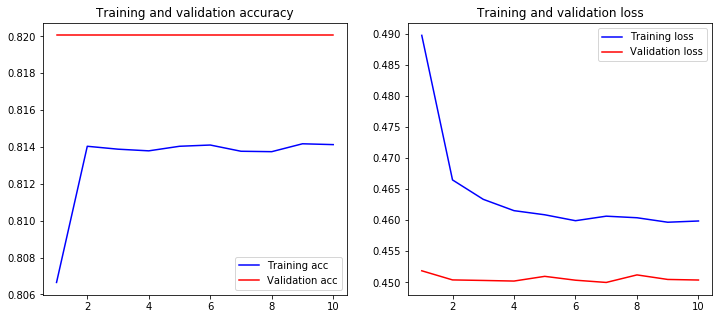

In [39]:
model = simpleNN()
history = model.fit(X_train, Y_train,
                    epochs=10,
                    verbose=1,
                    validation_data = (X_valid, Y_valid),
                    callbacks=callbacks_list,
                    batch_size=32)
print(model.summary())

loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print('Training Accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_valid, Y_valid, verbose=False)
print('Validation Accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print('Testing Accuracy: {:.4f}'.format(accuracy))

plot_history(history)